<a href="https://colab.research.google.com/github/albin2122/Netflix-Movies-And-TV-Shows-Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
netflix_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Modules/Topics/Project/Project-4- Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
row_count=netflix_df.shape[0]
column_count=netflix_df.shape[1]
print(f'no of rows is {row_count} ')
print(f'no of columns is {column_count}')

no of rows is 7787 
no of columns is 12


### Dataset Information

In [6]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
netflix_df[netflix_df.duplicated()].count()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_count=netflix_df.isnull().sum()
print(missing_count)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

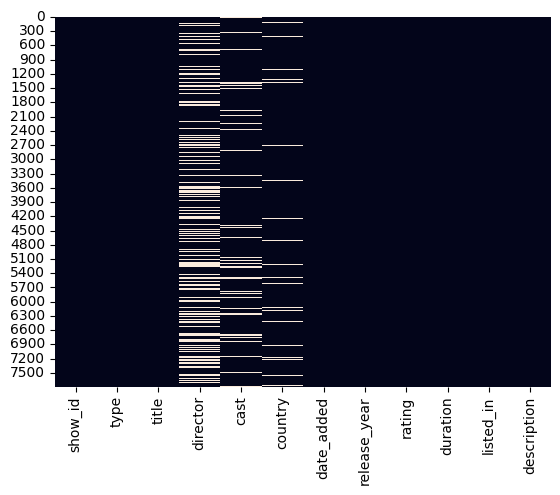

In [9]:
# Visualizing the missing values
sns.heatmap(netflix_df.isnull(), cbar=False)

### What did you know about your dataset?

Netflix dataset contains 7787 rows and 12 columns in which there is some null values . The column director does not have  2000+rows of data. There isnt any duplicate values .Other than director datas like cast,  country were also missing. All the data except release_year arre of object datatype

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


There is only one row with numeric datatype

In [12]:
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description: The Summary description

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for uni in netflix_df.columns:
  if netflix_df[uni].nunique()<10:
    unique_values=netflix_df[uni].unique()
    print(f'unique values in {uni} column are {unique_values}')
     

unique values in type column are ['TV Show' 'Movie']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
tv_df=netflix_df[netflix_df['type']=='TV Show']
movie_df=netflix_df[netflix_df['type']=='Movie']

### What all manipulations have you done and insights you found?

Created 2 dataframes for seprately study about the tv shows and movies in netflix

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Type

In [15]:
# Chart - 1 visualization code
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

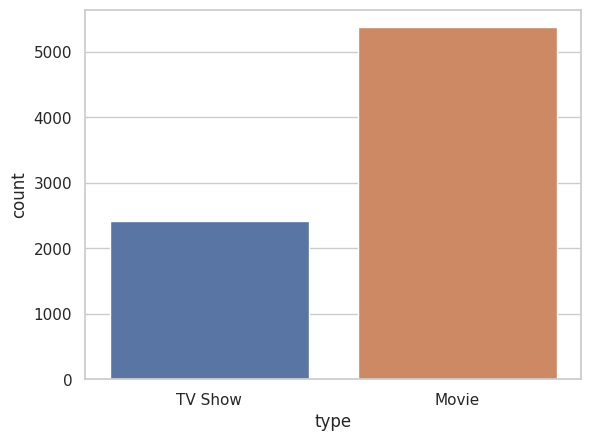

In [16]:
sns.set_theme(style="whitegrid")
sns.countplot(data=netflix_df, x="type",saturation=0.75, width=0.8, dodge=True)


##### 1. Why did you pick the specific chart?

To know the type of shows in the netflix

##### 2. What is/are the insight(s) found from the chart?

Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.

#### Chart - 2 - Column Title

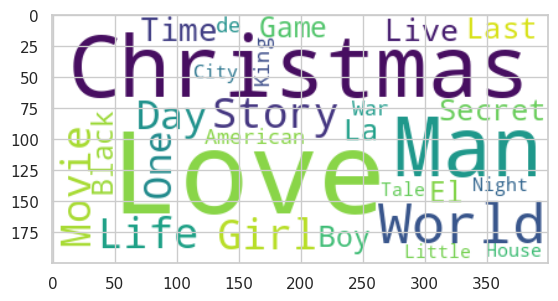

In [17]:
# Chart - 2 visualization code
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()
     

##### 1. Why did you pick the specific chart?

Frequent words in title column

##### 2. What is/are the insight(s) found from the chart?

Words like Love, world,christmas, math,story occours frequently

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Title of movies or tv shows

#### Chart - 3 - Column Director

In [18]:
print(f"Number of Movies directed by directors are : { netflix_df[netflix_df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : { netflix_df[netflix_df['type']=='Movie']['director'].value_counts().sum()}")
     

Number of Movies directed by directors are : 184
Number of TV shows directed by directors are : 5214


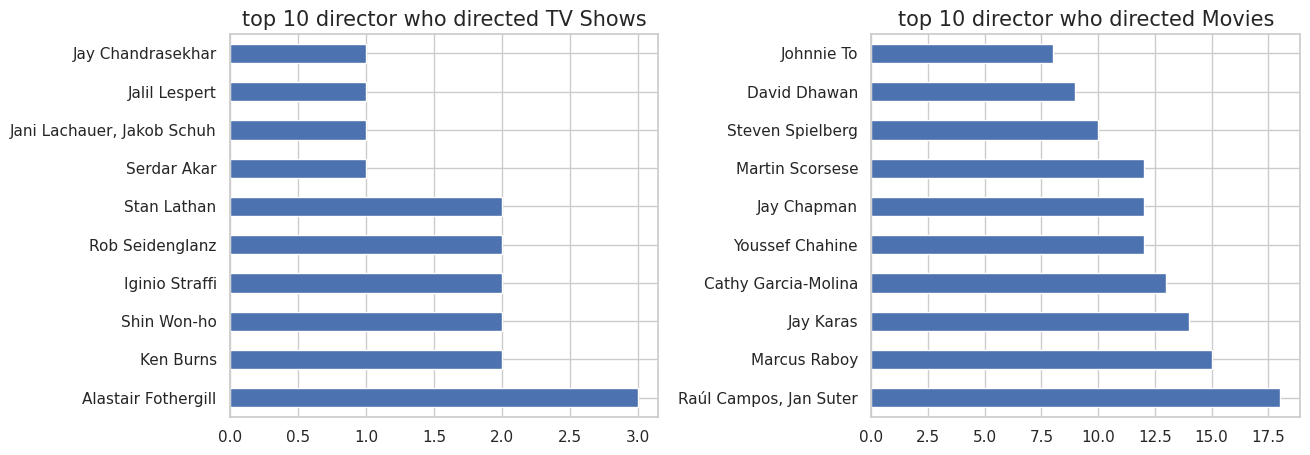

In [19]:

fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = tv_df['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = movie_df['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()
     

##### 1. Why did you pick the specific chart?

Top 10 directors in Tv shows and movies

##### 2. What is/are the insight(s) found from the chart?

* Director Alastair fothergill tops the list for top directors for directed tv shows
* raul campos , jan suter is the top director who directed movies

#### Chart - 4 - country

In [20]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


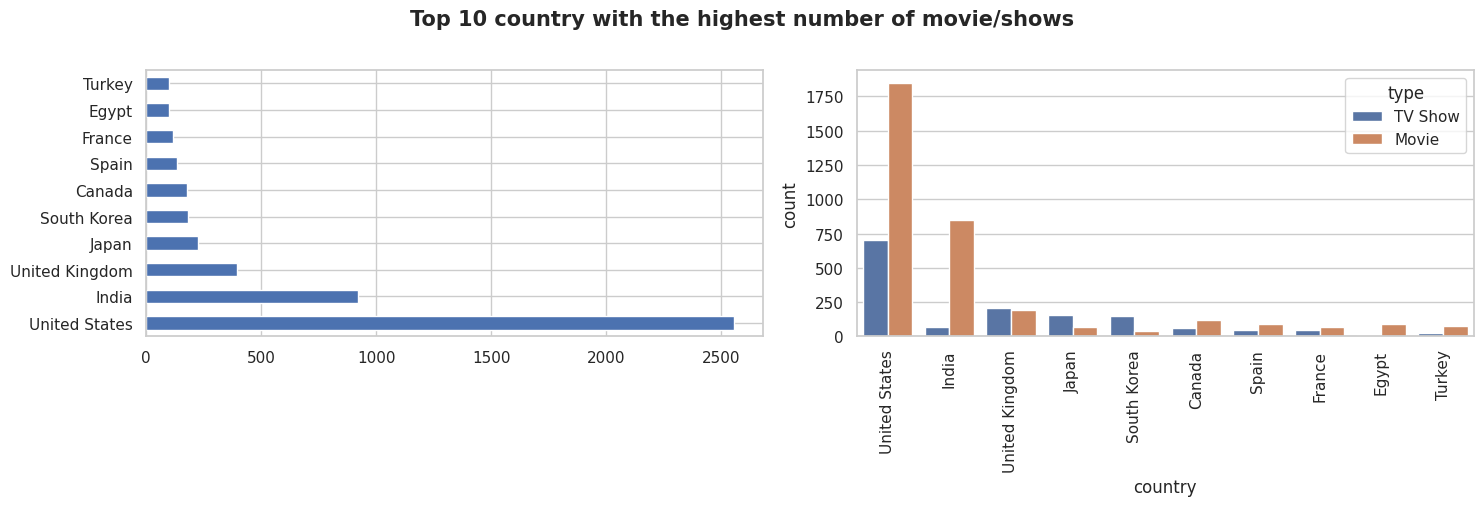

In [21]:
# Chart - 4 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
netflix_df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=netflix_df, hue='type', order=netflix_df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Countries with highest number of movies/tv shows

##### 2. What is/are the insight(s) found from the chart?

* united states has the highest number of movies and tv shows
* india came second to united states
* Huge number of shows are from us, more than 50%.


#### Chart - 5 -Month

In [22]:
# Chart - 5 visualization code
# Create new features to store date, day, month and year seperately.
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])  # First convert date_added to date time format.
netflix_df['day_added'] = netflix_df['date_added'].dt.day            # Compute day.
netflix_df['year_added'] = netflix_df['date_added'].dt.year          # Compute year.
netflix_df['month_added'] = netflix_df['date_added'].dt.month        # Compute month.
     

In [23]:
# Create dataframe to store manth values and counts.
months_df = pd.DataFrame(netflix_df.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

In [24]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)
# fig.show()
fig.show()

##### 1. Why did you pick the specific chart?

Month wise addition of new content

##### 2. What is/are the insight(s) found from the chart?

* December is the month wih highest addition of content
* Lowest is February
* we can see hike in content to the end of the year 
* january is an extension of december. After that we can see a sudden decrease in count

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

positive growth. It will help the business in a positive way

#### Chart - 6 -Yearly content addition

In [25]:
tv_df["date_added"] = pd.to_datetime(tv_df['date_added'])
movie_df["date_added"] = pd.to_datetime(movie_df['date_added'])

tv_df['year_added'] = tv_df['date_added'].dt.year  
movie_df['year_added'] = movie_df['date_added'].dt.year   

In [26]:
# Chart - 6 visualization code
content_1 = tv_df["year_added"].value_counts().reset_index()
content_1 = content_1.rename(columns = {"year_added" : "count", "index" : "year_added"})
content_1 = content_1.sort_values("year_added")

content_2 = movie_df["year_added"].value_counts().reset_index()
content_2 = content_2.rename(columns = {"year_added" : "count", "index" : "year_added"})
content_2 = content_2.sort_values("year_added")

trace1 = go.Scatter(x=content_1["year_added"], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2["year_added"], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()
# fig.show()

##### 1. Why did you pick the specific chart?

Addition of Movies/tv shows over the years

##### 2. What is/are the insight(s) found from the chart?

* There is almost same number of shows and movies are added untill 2014
* After 2014 we can see a hype in number of movies and tvshows
* The highest number of movies was added in 2019 , about 1497 movies
* The highest number of tv shows was added in the year 2020, slightly above than the year 2019


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Addition of content is increasing year by year  and therefore we need a source for all the data to store.
We can see in here a huge dip after 2020, it may be because of not having the complete data in the year 2021

#### Chart - 7 - release year

In [27]:
netflix_df=netflix_df.reset_index()

In [28]:
# Put the data into bins.
release_yr_bin = pd.cut(netflix_df.release_year, [1900, 1950, 1975, 2000,2010,2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6437
1,"(2000, 2010]",867
2,"(1975, 2000]",398
3,"(1950, 1975]",70
4,"(1900, 1950]",15


In [29]:
import plotly.graph_objs as go

# Prepare the data for the chart
labels = release_yr_bin['year_interval']
values = release_yr_bin['count']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Set the chart title
fig.update_layout(title='Fruit Sales')

# Show the chart
fig.show()


##### 1. Why did you pick the specific chart?

Understand what sort of movies/tv shows is there, that is new/old

##### 2. What is/are the insight(s) found from the chart?

* most of the movies are released after 2000.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Its good to know what sort of content are there  in the inventory
* it help us to understand thetaste of user , that is whether he/she likes old movies.
* people of old age tends to watch movies on their prime period, so it will be helpfull

#### Chart - 8 - Description word cloud

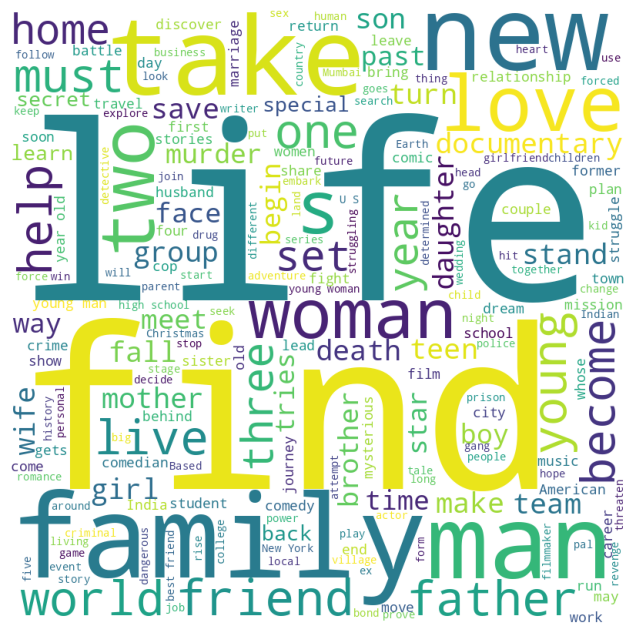

In [30]:
# Chart - 8 visualization code for type movies
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plots = ' '.join(movie_df['description'].tolist())
# Create a set of stopwords
stopwords = set(STOPWORDS)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords).generate(plots)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

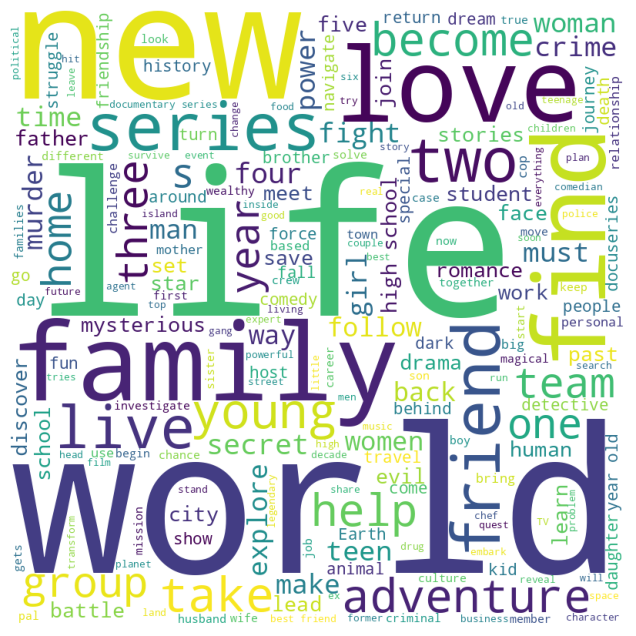

In [31]:
plots = ' '.join(tv_df['description'].tolist())
# Create a set of stopwords
stopwords = set(STOPWORDS)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords).generate(plots)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

To find the common words which occoured in description of both tv shows and movie

##### 2. What is/are the insight(s) found from the chart?

 For tv show:
* words like find, life, family, love, etc takes the most space

For movies:
* words like world, life, new ,family love , friend consumes the most space



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, In a word cloud, the size of each word is proportional to its frequency in the text, with larger words representing more commonly occurring words. Here this most common words represent people loves movies/ tv shows based on the same topics

#### Chart - 9 -Cast

In [32]:
# Chart - 9 visualization code
print(f"Number of TV Shows actors: {len(tv_df['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(movie_df['cast'].str.split(', ', expand=True).stack().value_counts())}")
     

Number of TV Shows actors: 13585
Number of Movies actors: 23049


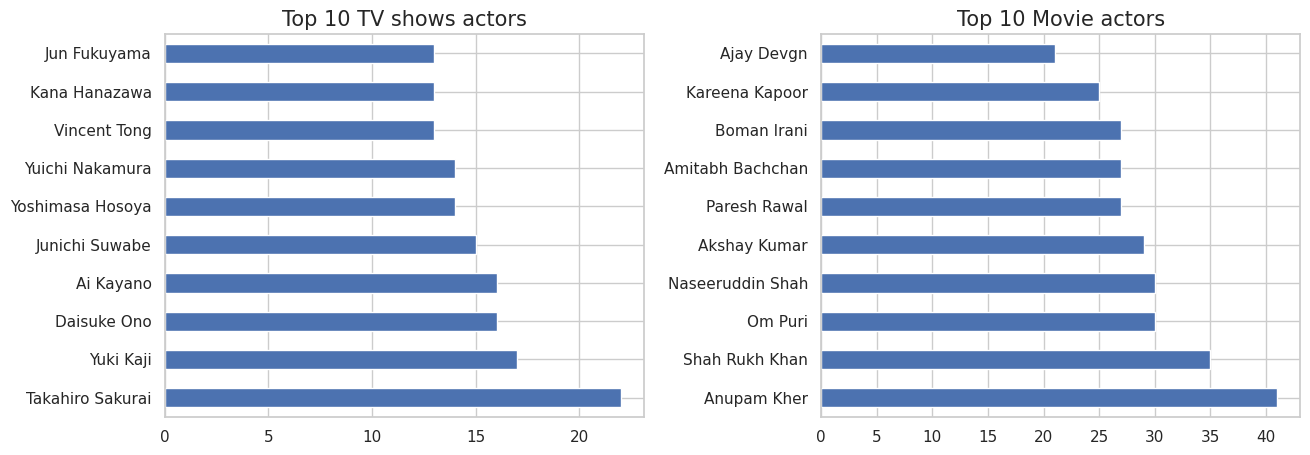

In [33]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = tv_df['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = movie_df['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

Movie and tv shows actors, actress.

##### 2. What is/are the insight(s) found from the chart?

* Takahiro sakurai has the highest content on netflix tv shows
* Anupam kher has the highest content on netflix movies
* Interestingly,  top 10 movies are all from india
* on the other side , no one from india is there in the top 10 list of tv shows cast

#### Chart - 10 - Rating

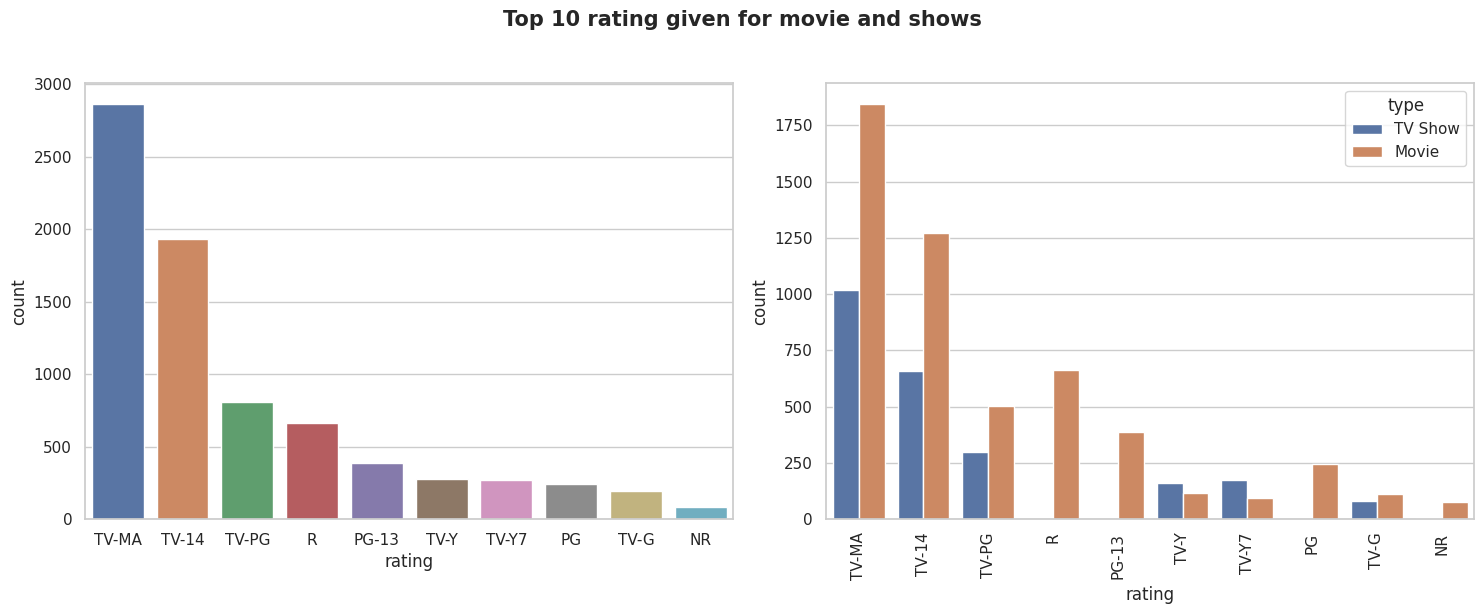

In [34]:
# Chart - 10 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=netflix_df, order=netflix_df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Rating of movies/Tv shows

##### 2. What is/are the insight(s) found from the chart?

* larger number of contents are mature contents (TV-MA)
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

#### Chart - 11 - Duration

In [35]:
# Chart - 11 visualization code
# Select the durations for both.
duration_tv_shows = tv_df['duration'].reset_index()
duration_movies = movie_df['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '').str.replace(' Seasons', '').str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

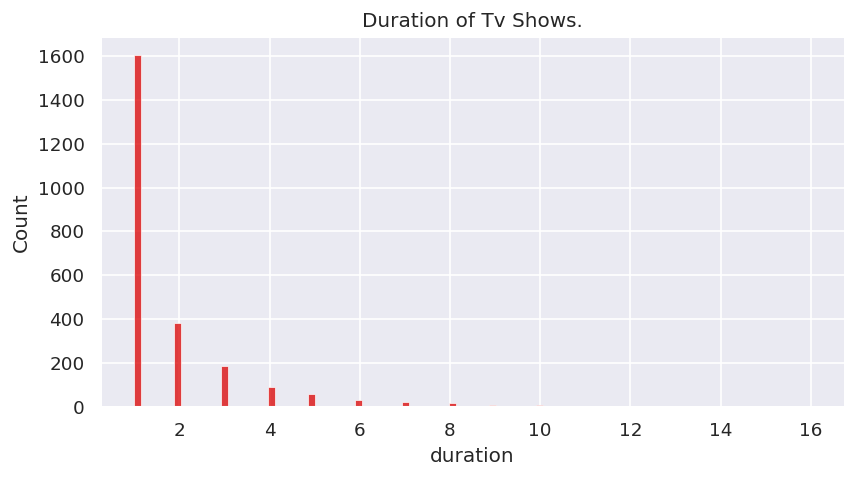

In [36]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()

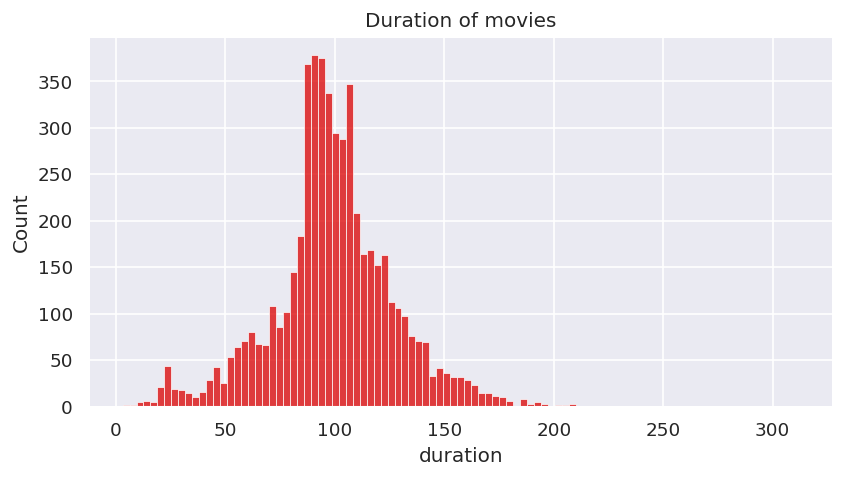

In [37]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### 1. Why did you pick the specific chart?

Duration of tv shows and movies

##### 2. What is/are the insight(s) found from the chart?

* Tv shows has an average duration of 2 seasons 
* Movies spread around an average of 100 minutes

#### Chart - 12 - listed in (genre)

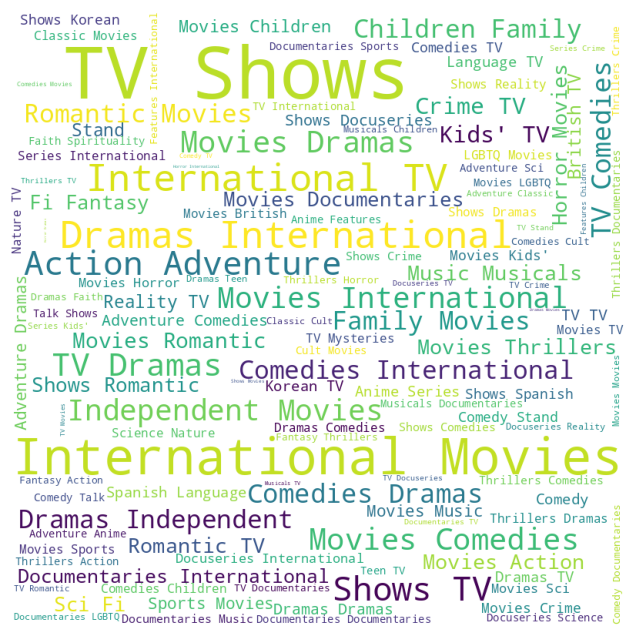

In [38]:
# Chart - 12 visualization code
plots = ' '.join(netflix_df['listed_in'].tolist())
# Create a set of stopwords
stopwords = set(STOPWORDS)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords).generate(plots)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Genre of movies most in netflix

##### 2. What is/are the insight(s) found from the chart?

* International movies is the most prominent genre 
* genres like family movies, children movies,comedy movies, drama etc are all holding a definite place in the word cloud

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it is important to know what type of movies / tv shows that users watch. And it will help us to recommend items that they needed.

#### Chart - 13 - Correlation Heatmap

In [39]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [40]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation
netflix_df.isnull().sum()

index              0
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
day_added         10
year_added        10
month_added       10
dtype: int64

In [45]:

# Remove null values in date_added.
netflix_df.dropna(subset=['date_added'], inplace=True)

In [46]:
netflix_df.isnull().sum()

index              0
show_id            0
type               0
title              0
director        2379
cast             718
country          506
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
day_added          0
year_added         0
month_added        0
dtype: int64

In [47]:
# rating columnn
netflix_df.dropna(subset=['rating'], inplace=True)

In [48]:
# Handling Missing Values & Missing Value Imputation for 'director','cast','country'
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna(' ')
netflix_df.dropna(axis=0, inplace=True)
     

In [49]:
netflix_df.isnull().sum()

index           0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
year_added      0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* we removed rows that are null values for columns date_added and rating
* for columns director, cast and country we just replaced it with a space

### 2. Handling Outliers

<Axes: >

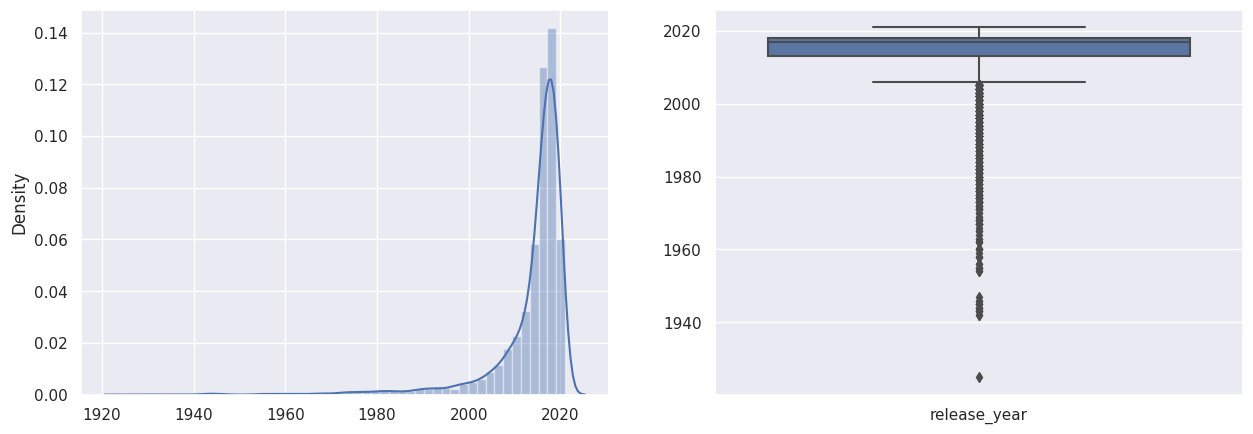

In [53]:
# Handling Outliers & Outlier treatments
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=netflix_df['release_year'], ax=ax[0])
sns.boxplot(data=netflix_df, ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

There isnt any outliers since all are of object type

### 3. Categorical Encoding

In [51]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

There is nothing to encode here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [52]:
# Expand Contraction
netflix_df.drop(columns=['index','show_id','day_added','year_added','month_added'],inplace=True)

In [55]:
#creating a new data frame having two columns title and 
#rest all columns in netflix_df are aggregating to  a single column 
textual_df = netflix_df[['title']]
textual_df['text'] = (netflix_df['description'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating']).astype(str)
textual_df.set_index('title', inplace = True)
textual_df.head()


,text
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [58]:
# Lower Casing
def lower_func(text):
    text = [word.lower() for word in text.split()]
    return " ".join(text)

  

In [59]:
textual_df['text'] = textual_df['text'].apply(lower_func)
textual_df['text'].head(2)

title
3%      in a future where the elite inhabit an island ...
7:19    after a devastating earthquake hits mexico cit...
Name: text, dtype: object

#### 3. Removing Punctuations

In [60]:
# Remove Punctuations
def remove_pun(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# apply the function to the 'text' column
textual_df['text'] = textual_df['text'].apply(remove_pun)
  

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***